# Generating Random Tweets

We have two objectives in this lab:
* Use text to generate a letter to letter transition matrix and a word-to-word transition matrix.
* Generate a tweet using our word-to-word transition matrix.

In this lab, we are going to walk through the steps of creating a transition matrix from text, in the vein of the article "How to fake a sophisticated knowledge of wine with Markov Chains" by Tony Fischetti.  Carter wrote code that was included in Homework 3 that generated tweets based on a transition matrix, and today we will be walking through how to generate that transition matrix from a sequence of text dynamically.

### Goal 1

* Take a sentence and strip it of punctuation.
* Make all of the letters lowercase.
* Create a sorted set of letters in the sentence.


In [2]:
# Our sentence
palindrome = "Able was I, ere I saw Elba."

# Get rid of punctuation
palindrome = palindrome.replace(",",'')
palindrome = palindrome.replace(".",'')

print(palindrome)

# convert letters to lowercase
lowerCase = palindrome.lower()
print(lowerCase)

#use a set to get rid of duplicates
letterSet = set(lowerCase)
print(letterSet)
#letterSet = list(letterSet)
#print(letterSet)
sortedSet = sorted(letterSet)
#sortedSet = list(sortedSet)
print(sortedSet)


Able was I ere I saw Elba
able was i ere i saw elba
{'w', 'r', 'i', 's', 'b', 'e', ' ', 'l', 'a'}
[' ', 'a', 'b', 'e', 'i', 'l', 'r', 's', 'w']


### Goal 2
We have nine letters in this sentence and want to count up the number of times each letter in the sentence comes after another letter.  This will give us the count of transitions from one letter to another.

* Count up the number of times each letter in our set of letters comes after another number.
* Turn our count matrix into a transition matrix.


In [3]:
import numpy as np

# we need to turn our <set> into a <list> so we can index it.
sortedSet = list(sortedSet)

# calculate the number of letters in our set
rows = len(sortedSet)
print(rows)

# Make a square matrix of zeros.
A = np.zeros((rows,rows))

# Find the length of the sentence
length = len(lowerCase)

# Go through the sentence letter by letter and add one to the i,j element of the matrix if
#  letter i comes after letter j.
for n in range(length-1):
    tempA = lowerCase[n]
    tempB = lowerCase[n+1]
    print(tempA, tempB)
    j = sortedSet.index(tempA)
    i = sortedSet.index(tempB)
    A[i,j] += 1

# print our matrix of transition counts.
print(A)

# now turn our matrix of counts into a transition matrix by dividing by the sums of each column:
for n in range(rows):
    tempSum = sum(A[:,n])
    A[:,n]/=tempSum

    B = np.around(A,2)
print(B)

#note -- we could also do this the way we did last Friday.



9
a b
b l
l e
e  
  w
w a
a s
s  
  i
i  
  e
e r
r e
e  
  i
i  
  s
s a
a w
w  
  e
e l
l b
b a
[[0. 0. 0. 2. 2. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0. 1. 1. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.5  1.   0.   0.   0.5  0.5 ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5  0.5 ]
 [0.   0.33 0.   0.   0.   0.5  0.   0.   0.  ]
 [0.33 0.   0.   0.   0.   0.5  1.   0.   0.  ]
 [0.33 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.17 0.33 0.   0.   0.   0.   0.   0.   0.  ]
 [0.17 0.33 0.   0.   0.   0.   0.   0.   0.  ]]


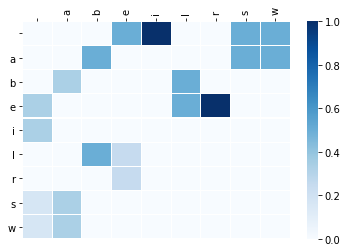

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm

# this creates a visual representation of the transition matrix 
# . (code courtesy of Carter Rhea)
labels = list(sortedSet)

ax = sns.heatmap(np.array(A),cmap=matplotlib.cm.Blues,linewidths=.1)
# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(A.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(A.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(labels, minor=False)

ax.xaxis.tick_top()
# rotate the x-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
fig = ax.get_figure()
plt.show(fig)

### Goal 3
We want to use this transition matrix to generate a Markov chain.  To get a sense of how to do this, lets look at the following two examples of code for the following transition matrix:
$$
\mathbf{T} = \begin{bmatrix} 0.5 & 0.25 & 0 \\ 0.5 & 0.5 & 0.5 \\ 0 & 0.25 & 0.5 \end{bmatrix} 
$$
 * The first generates a Markov chain with three states: A, B, or C.
 * The second generates a Markov chain with the same transition matrix, but does so more efficiently (when we have bigger transition matrices such as the $9 \times 9$ matrix above, it is unwieldy to write out 81 if/elif/else statements.)

['A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'B', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'C', 'C', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'C', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'C', 'B', 'A', 'A', 'B', 'B', 'A', 'B', 'C', 'B']


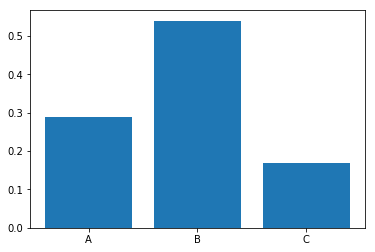

In [4]:
import numpy.random as npr
# Start in state 'A'
currentState = 'A'
newState = ''
stateList = []
for i in range(0,100):
    stateList.append(currentState)
    myRand = npr.rand();
    if (currentState == 'A'):
        if (myRand < 0.5):
            newState = 'A' #stay in state 'A'
        elif (myRand >= 0.5 and myRand < 1):
            newState = 'B' #move to state 'B'
        else :
            print ('somthing bad happened!')
    elif (currentState == 'B'): #currentState = 'B'
        if (myRand < 0.25):
            newState = 'A' #go to state 'A'
        elif (myRand >= 0.25 and myRand < 0.25 + 0.5):
            newState = 'B' #stay in state 'B'
        elif (myRand >= 0.25+0.5 and myRand < 0.25 + 0.5 + 0.25):
            newState = 'C' #move to state 'B'
        else :
            print ('somthing bad happened!')
    elif (currentState == 'C'): #currentState = 'C'
        if (myRand < 0.5):
            newState = 'B' #go to state 'B'
        elif (myRand >= 0.5 and myRand < 1):
            newState = 'C' #stay in state 'C'
        else :
            print ('somthing bad happened!')
    else :
        print ('something BAD happened!')
    currentState = newState

print(stateList) 
a = stateList.count('A')/100
b = stateList.count('B')/100
c = stateList.count('C')/100

import matplotlib.pyplot as plt
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=[a,b,c]) # the heaght of each bar.
plt.xticks(x, ['A','B','C']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot  

['A', 'B', 'A', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'C', 'B', 'B', 'A', 'B', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'A', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'C', 'C', 'B', 'A', 'B', 'B']


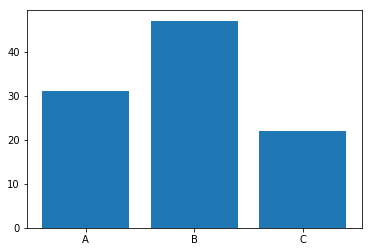

In [4]:
states = ['A', 'B', 'C']
currentState = 0 #represent the state with a number instead of a letter
newState = -1
stateList = []
stateCount = [0,0,0]
numStates = 3
# here is the transition matrix.
T = np.matrix([[0.5, 0.25, 0], [0.5,0.5,0.5],[0,0.25,0.5]])

for i in range(0,100):
    stateList.append(states[currentState]) #get the name of the state in position <currentState>
    myRand = npr.rand();
    mySum = 0
    for m in range(0,numStates):
        # we use where the random number myRand falls within the column of the matrix to generate our next state.
        if mySum < myRand and myRand <= mySum + T[m,currentState]:
            newState = m
        mySum += T[m,currentState]
    currentState = newState
    stateCount[currentState]+=1
print(stateList)

import matplotlib.pyplot as plt
x = [0,1,2]  #specify where on the x-axis you want to plot the histogram.
plt.bar(x,height=stateCount) # the heaght of each bar.
plt.xticks(x, ['A','B','C']) # the name of each bar, shown below the x-axis.
plt.show() #show the plot  

### Goal 4
Generate a Markov chain of letters based on our matrix A above.


In [5]:
# First we need a list of states and a transition matrix
print(sortedSet)
print(A)

numStates = len(sortedSet)
print(numStates)
currentState = npr.randint(0,numStates)

myTweet = []
# Then we need to generate the Markov chain.  The states will be letters from the sortedSet

for i in range(0,100):
    myTweet.append(sortedSet[currentState]) #get the name of the state in position <currentState>
    myRand = npr.rand();
    mySum = 0
    for m in range(0,numStates):
        # we use where the random number myRand falls within the column of the matrix to generate our next state.
        if mySum < myRand and myRand <= mySum + A[m,currentState]:
            newState = m
        mySum += A[m,currentState]
    currentState = newState
    
# Finally we want to print the tweet.
print("".join(myTweet))

[' ', 'a', 'b', 'e', 'i', 'l', 'r', 's', 'w']
[[0.         0.         0.         0.5        1.         0.
  0.         0.5        0.5       ]
 [0.         0.         0.5        0.         0.         0.
  0.         0.5        0.5       ]
 [0.         0.33333333 0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.5
  1.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.5        0.25       0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.25       0.         0.
  0.         0.         0.        ]
 [0.16666667 0.33333333 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.16666667 0.33333333 0.         0.         0.         0.
  0.         0.         0.        ]]
9
i i i waw i was i s sababawablblere w i i i e erere i i e i ere ere i sas i elbablbas

### Exercise 1
Use the same process to generate a Markov chain tweet of letters with your own sentence.

### Exercise 2
* Given the paragraph below, generate a transition matrix for each word pair.

> A Markov chain is a stochastic process with the Markov property. The term Markov chain refers to the sequence of random variables such a process moves through, with the Markov property defining serial dependence only between adjacent periods as in a chain. It can thus be used for describing systems that follow a chain of linked events, where what happens next depends only on the current state of the system"

* Generate a tweet of words.  The code below will get you started.

In [6]:
#Paragraph comes from wikipedia article on markov chains
paragraph = "A Markov chain is a stochastic process with the Markov property. The term Markov chain refers to the sequence of random variables such a process moves through, with the Markov property defining serial dependence only between adjacent periods as in a chain. It can thus be used for describing systems that follow a chain of linked events, where what happens next depends only on the current state of the system"

paragraph = paragraph.replace("'","")
paragraph = paragraph.replace(".","")
paragraph = paragraph.replace(",","")
paragraph = paragraph.lower()

print(paragraph)
wordList = []
# this is another way to create a list of words without double-counting.
totalWordList = paragraph.split(" ")
print(totalWordList)
for word in totalWordList:
    if word not in wordList:
        wordList.append(word)
    else:
        pass
print(wordList)
lenWL = len(wordList)
transMat = np.zeros((lenWL,lenWL))

# Next we need to create a matrix of transition counts.  
#  Be careful -- the word "system" doesn't have any words that come after it!
length = len(totalWordList)

for n in range(0,length-1):
    tempA = totalWordList[n]
    tempB = totalWordList[n+1]
    print(tempA, tempB)
    j = wordList.index(tempA)
    i = wordList.index(tempB)
    transMat[i,j] += 1
    
print(transMat)

# now turn our matrix of counts into a transition matrix by dividing by the sums of each column:
for n in range(lenWL):
    tempSum = sum(transMat[:,n])
    if tempSum == 0:
        transMat[n,n] = 1
    else:
        transMat[:,n]/=tempSum

    B = np.around(transMat,2)
print(B)




a markov chain is a stochastic process with the markov property the term markov chain refers to the sequence of random variables such a process moves through with the markov property defining serial dependence only between adjacent periods as in a chain it can thus be used for describing systems that follow a chain of linked events where what happens next depends only on the current state of the system
['a', 'markov', 'chain', 'is', 'a', 'stochastic', 'process', 'with', 'the', 'markov', 'property', 'the', 'term', 'markov', 'chain', 'refers', 'to', 'the', 'sequence', 'of', 'random', 'variables', 'such', 'a', 'process', 'moves', 'through', 'with', 'the', 'markov', 'property', 'defining', 'serial', 'dependence', 'only', 'between', 'adjacent', 'periods', 'as', 'in', 'a', 'chain', 'it', 'can', 'thus', 'be', 'used', 'for', 'describing', 'systems', 'that', 'follow', 'a', 'chain', 'of', 'linked', 'events', 'where', 'what', 'happens', 'next', 'depends', 'only', 'on', 'the', 'current', 'state', 

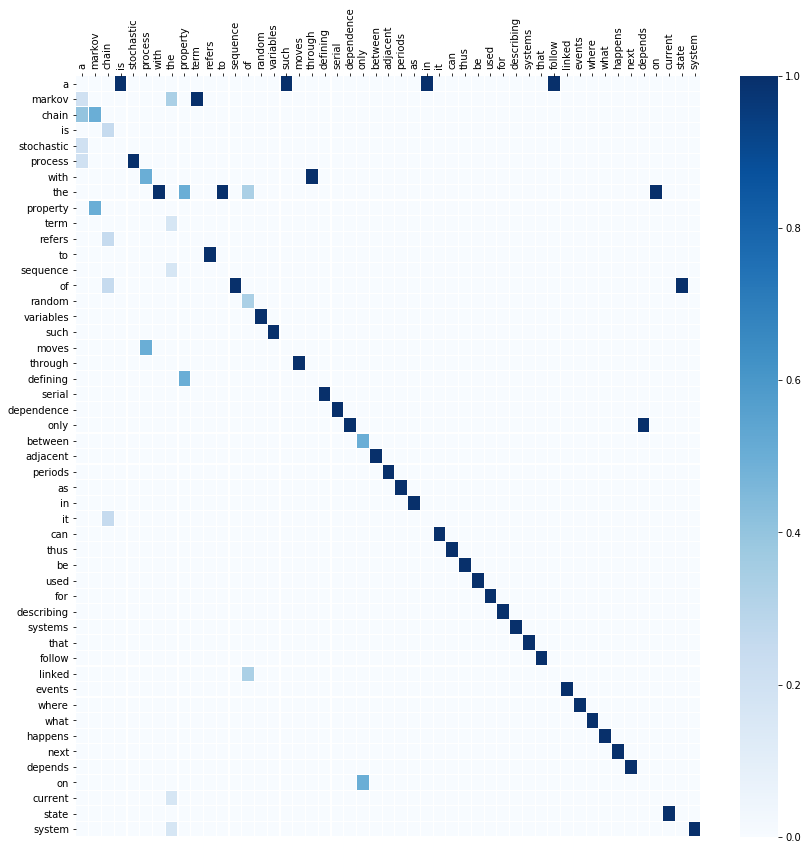

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm

# this creates a visual representation of the transition matrix 
# . (code courtesy of Carter Rhea)
labels = list(wordList)

ax = sns.heatmap(np.array(transMat),cmap=matplotlib.cm.Blues,linewidths=.1)
# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(transMat.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(transMat.shape[1]) + 0.5, minor=False)
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(labels, minor=False)
plt.rcParams["figure.figsize"] = [14,16]
ax.xaxis.tick_top()
# rotate the x-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)
fig = ax.get_figure()
plt.show(fig)

In [10]:
# First we need a list of states and a transition matrix
print(wordList)
print(transMat)

numStates = len(wordList)
print(numStates)
currentState = npr.randint(0,numStates)

myTweet = []
# Then we need to generate the Markov chain.  The states will be letters from the sortedSet

for i in range(0,100):
    myTweet.append(wordList[currentState]) #get the name of the state in position <currentState>
    myRand = npr.rand();
    mySum = 0
    for m in range(0,numStates):
        # we use where the random number myRand falls within the column of the matrix to generate our next state.
        if mySum < myRand and myRand <= mySum + transMat[m,currentState]:
            newState = m
        mySum += transMat[m,currentState]
    currentState = newState
    
# Finally we want to print the tweet.
print(" ".join(myTweet))

['a', 'markov', 'chain', 'is', 'stochastic', 'process', 'with', 'the', 'property', 'term', 'refers', 'to', 'sequence', 'of', 'random', 'variables', 'such', 'moves', 'through', 'defining', 'serial', 'dependence', 'only', 'between', 'adjacent', 'periods', 'as', 'in', 'it', 'can', 'thus', 'be', 'used', 'for', 'describing', 'systems', 'that', 'follow', 'linked', 'events', 'where', 'what', 'happens', 'next', 'depends', 'on', 'current', 'state', 'system']
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.2 0.  0.  ... 0.  0.  0. ]
 [0.4 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  1. ]]
49
events where what happens next depends only on the sequence of the term markov chain is a chain refers to the system system system system system system system system system system system system system system system system system system system system system system system system system system system system system system system system system system sys

In [13]:
#Paragraph comes from wikipedia article on markov chains
paragraph = "Well I've heard there was a secret chord That David played and it pleased the \
Lord But you don't really care for music, do you? Well it goes like this: \
The fourth, the fifth, the minor fall and the major lift \
The baffled king composing Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Well your faith was strong but you needed proof \
You saw her bathing on the roof \
Her beauty and the moonlight overthrew ya \
She tied you to her kitchen chair \
And she broke your throne and she cut your hair \
And from your lips she drew the Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
But baby I've been here before \
I've seen this room and I've walked this floor \
You know, I used to live alone before I knew ya \
And I've seen your flag on the marble arch \
And love is not a victory march \
It's a cold and it's a broken Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Well there was a time when you let me know \
What's really going on below \
But now you never show that to me do ya \
But remember when I moved in you \
And the holy dove was moving too \
And every breath we drew was Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Maybe there's a God above \
But all I've ever learned from love \
Was how to shoot somebody who outdrew ya \
And it's not a cry that you hear at night \
It's not somebody who's seen the light \
It's a cold and it's a broken Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah \
Hallelujah"

paragraph = paragraph.replace("'","")
paragraph = paragraph.replace(".","")
paragraph = paragraph.replace(",","")
paragraph = paragraph.lower()

print(paragraph)
wordList = []
# this is another way to create a list of words without double-counting.
totalWordList = paragraph.split(" ")
print(totalWordList)
for word in totalWordList:
    if word not in wordList:
        wordList.append(word)
    else:
        pass
print(wordList)
lenWL = len(wordList)
transMat = np.zeros((lenWL,lenWL))

# Next we need to create a matrix of transition counts.  
#  Be careful -- the word "system" doesn't have any words that come after it!
length = len(totalWordList)

for n in range(0,length-1):
    tempA = totalWordList[n]
    tempB = totalWordList[n+1]
    print(tempA, tempB)
    j = wordList.index(tempA)
    i = wordList.index(tempB)
    transMat[i,j] += 1
    
print(transMat)

# now turn our matrix of counts into a transition matrix by dividing by the sums of each column:
for n in range(lenWL):
    tempSum = sum(transMat[:,n])
    if tempSum == 0:
        transMat[n,n] = 1
    else:
        transMat[:,n]/=tempSum

    B = np.around(transMat,2)
print(B)


well ive heard there was a secret chord that david played and it pleased the lord but you dont really care for music do you? well it goes like this: the fourth the fifth the minor fall and the major lift the baffled king composing hallelujah hallelujah hallelujah hallelujah hallelujah well your faith was strong but you needed proof you saw her bathing on the roof her beauty and the moonlight overthrew ya she tied you to her kitchen chair and she broke your throne and she cut your hair and from your lips she drew the hallelujah hallelujah hallelujah hallelujah hallelujah but baby ive been here before ive seen this room and ive walked this floor you know i used to live alone before i knew ya and ive seen your flag on the marble arch and love is not a victory march its a cold and its a broken hallelujah hallelujah hallelujah hallelujah hallelujah well there was a time when you let me know whats really going on below but now you never show that to me do ya but remember when i moved in you 

In [15]:
# First we need a list of states and a transition matrix
print(wordList)
print(transMat)

numStates = len(wordList)
print(numStates)
currentState = npr.randint(0,numStates)

myTweet = []
# Then we need to generate the Markov chain.  The states will be letters from the sortedSet

for i in range(0,300):
    myTweet.append(wordList[currentState]) #get the name of the state in position <currentState>
    myRand = npr.rand();
    mySum = 0
    for m in range(0,numStates):
        # we use where the random number myRand falls within the column of the matrix to generate our next state.
        if mySum < myRand and myRand <= mySum + transMat[m,currentState]:
            newState = m
        mySum += transMat[m,currentState]
    currentState = newState
    
# Finally we want to print the tweet.
print(" ".join(myTweet))

['well', 'ive', 'heard', 'there', 'was', 'a', 'secret', 'chord', 'that', 'david', 'played', 'and', 'it', 'pleased', 'the', 'lord', 'but', 'you', 'dont', 'really', 'care', 'for', 'music', 'do', 'you?', 'goes', 'like', 'this:', 'fourth', 'fifth', 'minor', 'fall', 'major', 'lift', 'baffled', 'king', 'composing', 'hallelujah', 'your', 'faith', 'strong', 'needed', 'proof', 'saw', 'her', 'bathing', 'on', 'roof', 'beauty', 'moonlight', 'overthrew', 'ya', 'she', 'tied', 'to', 'kitchen', 'chair', 'broke', 'throne', 'cut', 'hair', 'from', 'lips', 'drew', 'baby', 'been', 'here', 'before', 'seen', 'this', 'room', 'walked', 'floor', 'know', 'i', 'used', 'live', 'alone', 'knew', 'flag', 'marble', 'arch', 'love', 'is', 'not', 'victory', 'march', 'its', 'cold', 'broken', 'time', 'when', 'let', 'me', 'whats', 'going', 'below', 'now', 'never', 'show', 'remember', 'moved', 'in', 'holy', 'dove', 'moving', 'too', 'every', 'breath', 'we', 'maybe', 'theres', 'god', 'above', 'all', 'ever', 'learned', 'how', '

The code provided below generates a next state in a Markov chain from a transition matrix.
```python
import numpy as np
badState = -1
def markovStep(myMatrix, myState):
    #requires: myMatrix be a Markov transition matrix
    #requires:  0 < myState < number of columns of myMatrix
    #first use myMatrix.shape to check if the matrix is square
    if myMatrix.shape[0] != myMatrix.shape[1]:
        return badState
    else:
        myRand = np.random.rand()
        mySum = 0
        for m in range(myMatrix.shape[0]):
            if mySum < myRand and myRand <= mySum + myMatrix[m,myState]:
                return m
            else:
                mySum += myMatrix[m,myState]
    print("Something bad happened")
    return myState
```